# Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

Results: You have to build a solution that should able to predict the sales of the
different stores of Big Mart according to the provided dataset.

# Importing necessary modules

In [119]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import os

# Load Dataset

In [36]:
train_ds=pd.read_csv(r"C:\Users\Derrick T\Downloads\Ineuron\archive\Train.csv")
test_ds=pd.read_csv(r"C:\Users\Derrick T\Downloads\Ineuron\archive\Test.csv")

In [4]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [86]:
#statistical summary
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [87]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Pre-Processing the Data

In [88]:
train_ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#checking categorical values
category_list = []
for x in train_ds.dtypes.index:
    if train_ds.dtypes[x] == 'object':
        category_list.append(x)
        print(category_list)


['Item_Identifier']
['Item_Identifier', 'Item_Fat_Content']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [30]:
category_list.remove('Item_Identifier')

ValueError: list.remove(x): x not in list

In [9]:
for columns in category_list:
    print(columns)
    print(train_ds[columns].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [135]:
#replacing null values with mean or (mode for string values)
mean_value = train_ds['Item_Weight'].mean()
train_ds['Item_Weight'].fillna(mean_value, inplace=True)

In [136]:
most_frequent_value = train_ds['Outlet_Size'].mode()[0]
train_ds['Outlet_Size'].fillna(most_frequent_value, inplace=True)

In [12]:
train_ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
sum(train_ds['Item_Visibility']==0)

526

In [137]:
train_ds.loc[:, 'Item_Visibility'].replace([0], [train_ds['Item_Visibility'].mean()], inplace=True)
sum(train_ds['Item_Visibility']==0)

0

In [12]:
#categorizing into same values as only the name is different
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [22]:
train_ds['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
#to get first 2 letters of each item identifier as it represent the food category
train_ds['Simple way-Item Type'] = train_ds['Item_Identifier'].apply(lambda x: x[:2])
train_ds['Simple way-Item Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Simple way-Item Type, Length: 8523, dtype: object

In [14]:
#converting or replacing short forms with actual words for easy understanding
train_ds['Simple way-Item Type'] = train_ds['Simple way-Item Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
train_ds['Simple way-Item Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Simple way-Item Type, dtype: int64

In [15]:
train_ds.loc[train_ds['Simple way-Item Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
train_ds['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [28]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Simple way-Item Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


# Visually Exploring the Data |  'distplot' for numericals & 'countplot' for categorical values

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

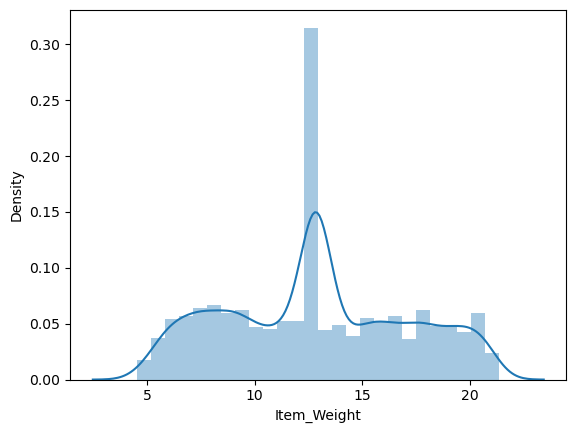

In [29]:
sns.distplot(train_ds['Item_Weight'])

In [27]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Simple way-Item Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

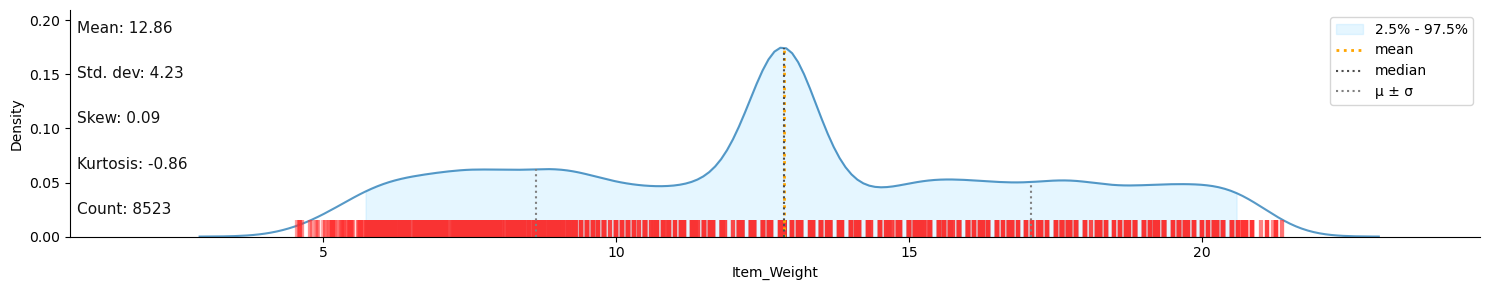

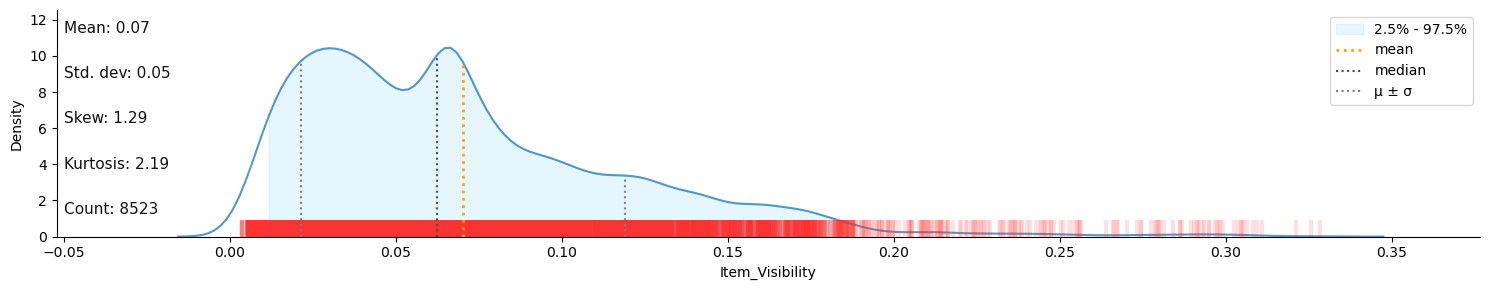

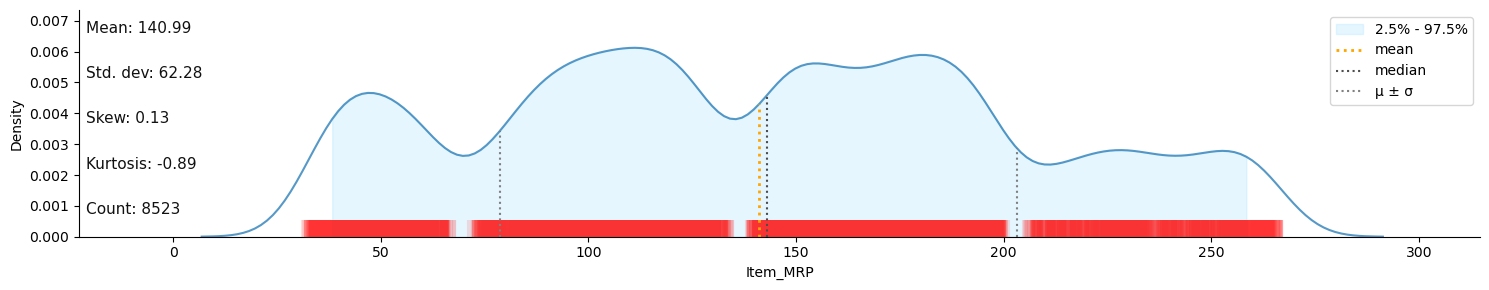

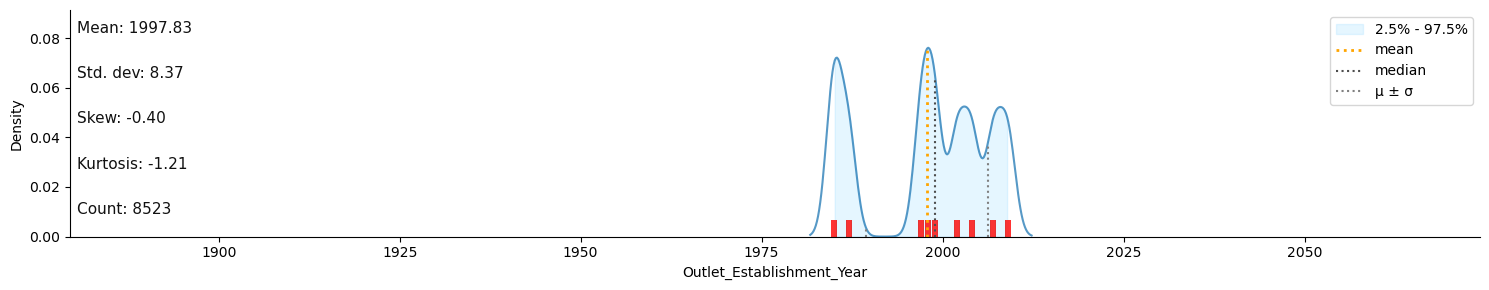

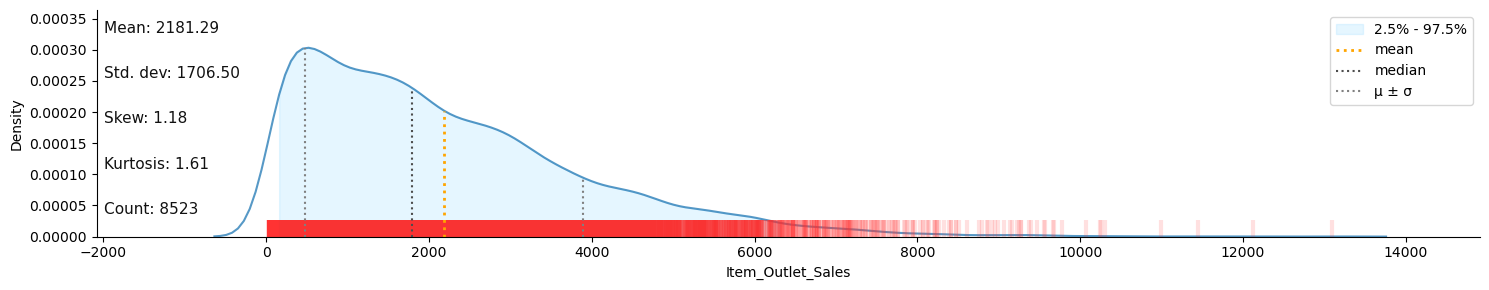

In [52]:
import klib
klib.dist_plot(train_ds)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

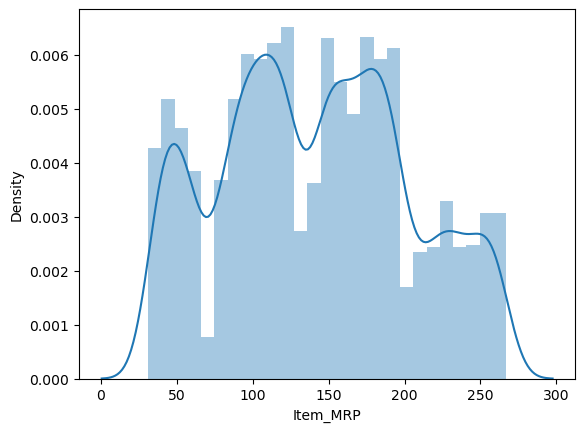

In [31]:
sns.distplot(train_ds['Item_MRP'])

<Figure size 3000x1500 with 0 Axes>

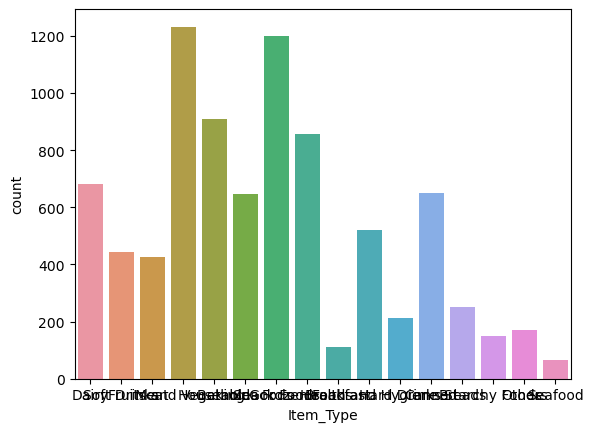

<Figure size 3000x1500 with 0 Axes>

In [37]:
sns.countplot(train_ds['Item_Type'])
plt.figure(figsize=(30,15))

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

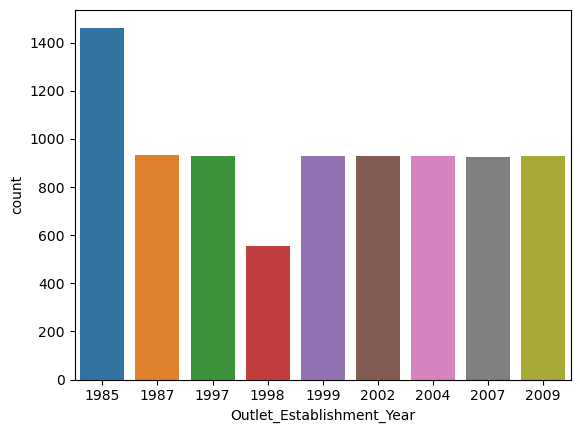

In [41]:
sns.countplot(train_ds['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

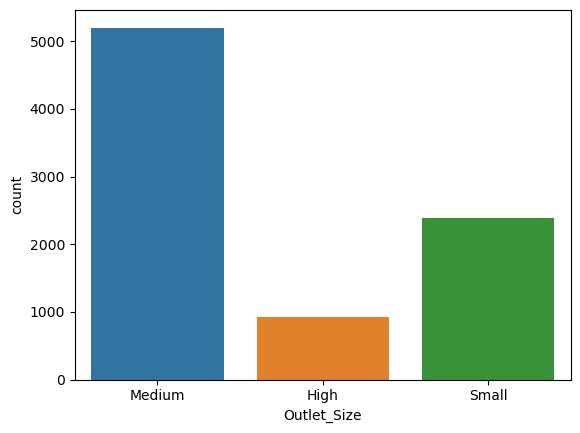

In [34]:
sns.countplot(train_ds['Outlet_Size'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

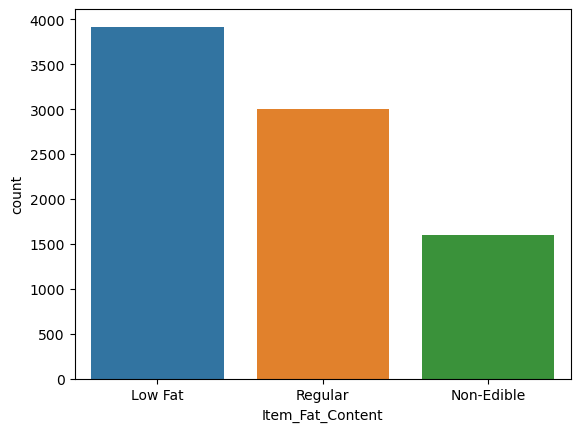

In [35]:
sns.countplot(train_ds['Item_Fat_Content'])

# This heatmap indicates that Item sales and Item Mrp are strongly co-related

<AxesSubplot:>

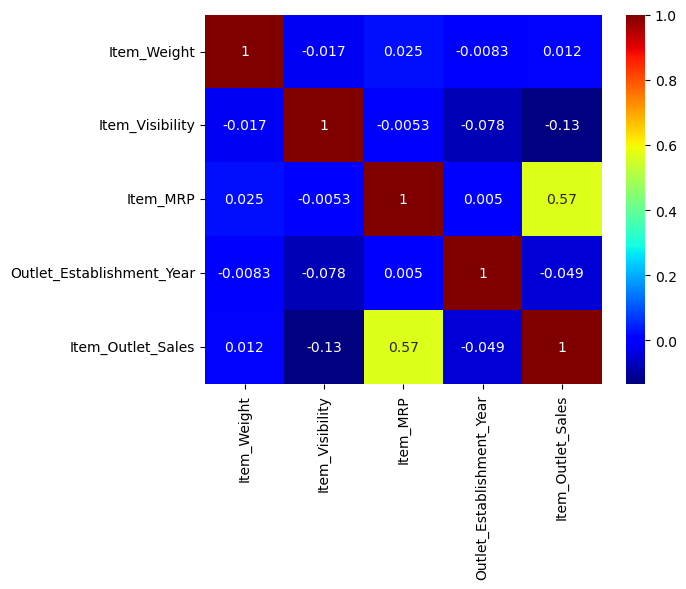

In [46]:
corr = train_ds.corr()
sns.heatmap(corr, annot=True, cmap='jet')

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

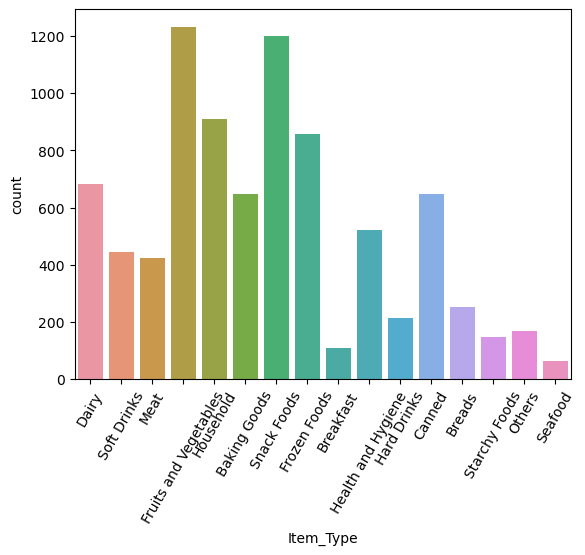

In [40]:
l = list(train_ds['Item_Type'].unique())
chart = sns.countplot(train_ds["Item_Type"])
chart.set_xticklabels(labels=l, rotation=60)

In [43]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Simple way-Item Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [48]:
pip install klib

     -------------------------------------- 133.1/133.1 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


GridSpec(6, 8)

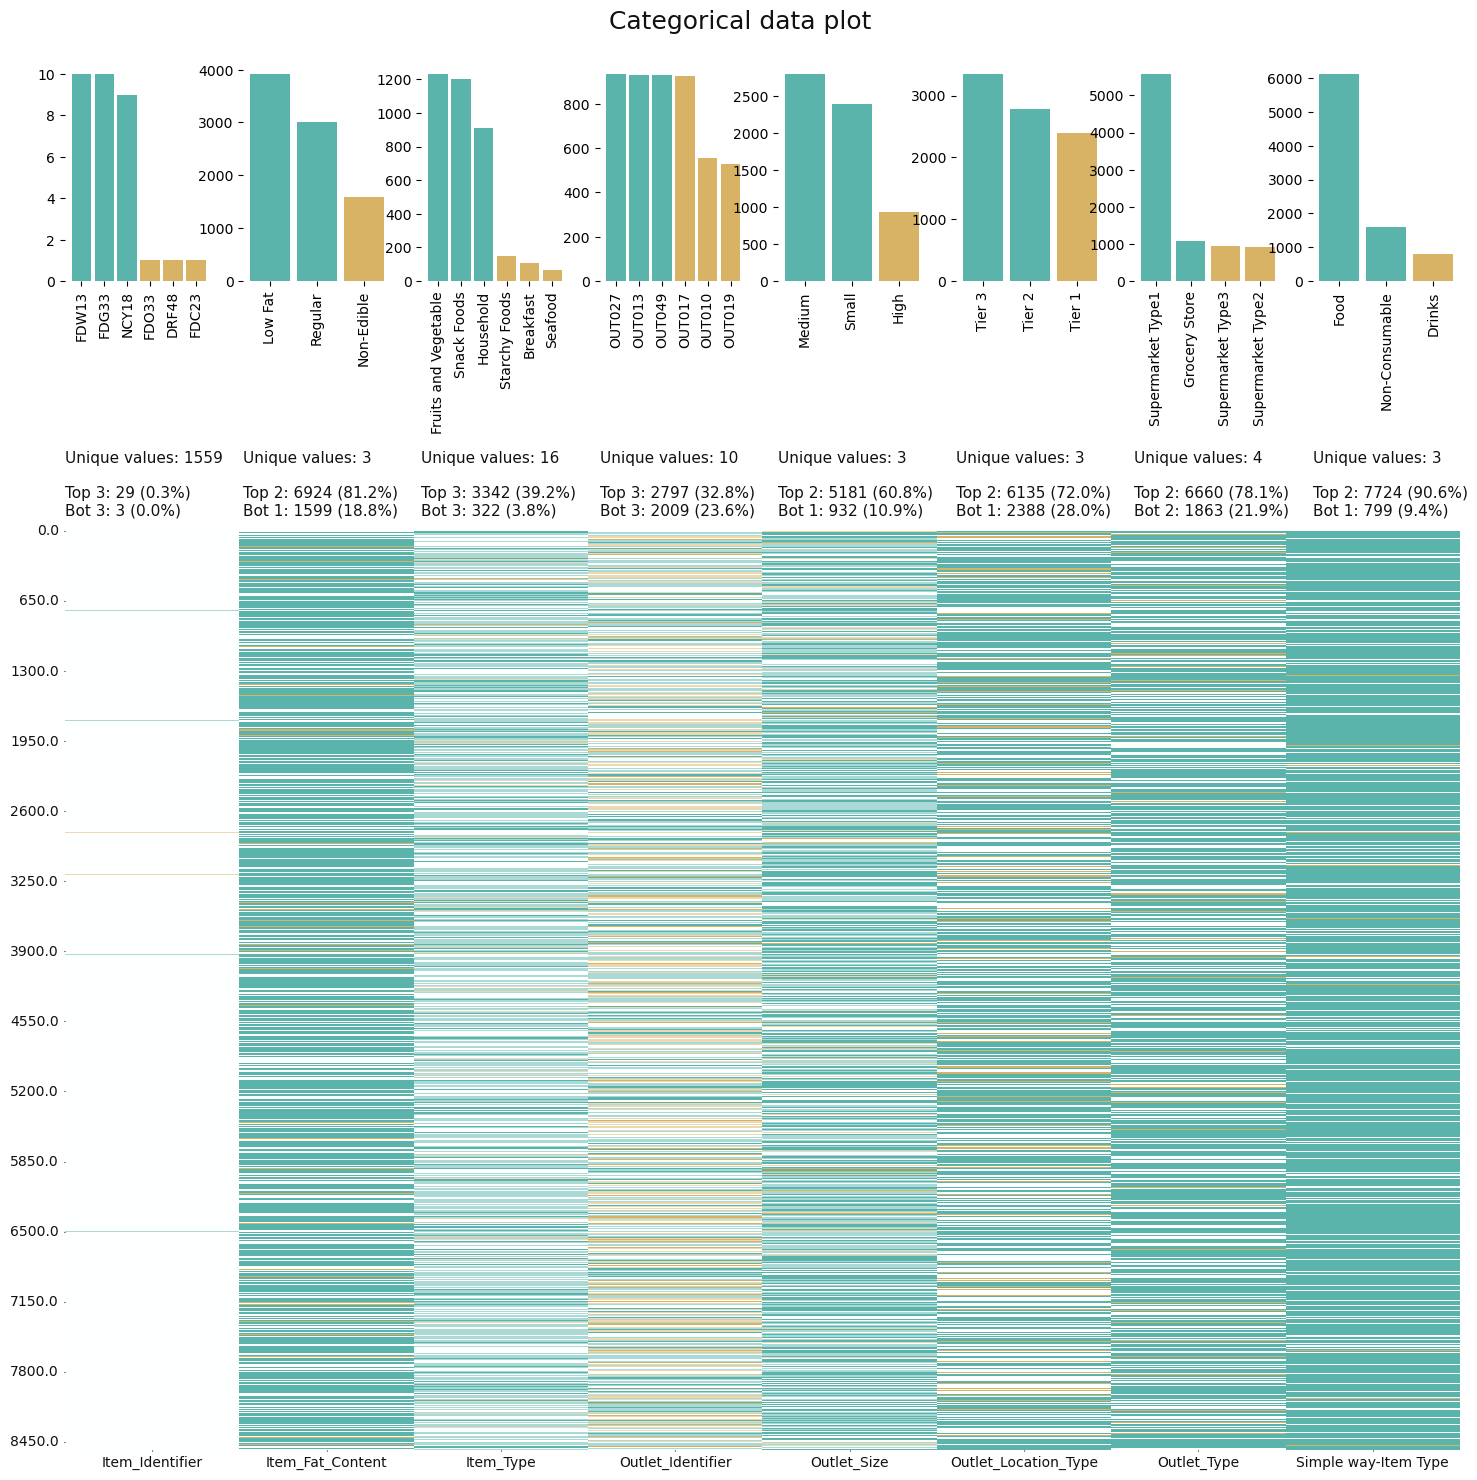

In [16]:
import klib
klib.cat_plot(train_ds)

In [138]:
train_ds=klib.convert_datatypes(train_ds)  #to convert datatypes to smaller or more efficient types


# Further Pre-Processing before model development

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [140]:
train_ds['Item_Type']= le.fit_transform(train_ds['Item_Type'])
train_ds['Outlet_Size']= le.fit_transform(train_ds['Outlet_Size'])
train_ds['Outlet_Location_Type']= le.fit_transform(train_ds['Outlet_Location_Type'])
train_ds['Outlet_Type']= le.fit_transform(train_ds['Outlet_Type'])    
train_ds['Item_Fat_Content']= le.fit_transform(train_ds['Item_Fat_Content'])

In [54]:
train_ds.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


# Splitting into train and test data

In [141]:
x=train_ds.drop('Item_Outlet_Sales',axis=1)

#input

In [142]:
y=train_ds['Item_Outlet_Sales']

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=101,test_size=0.2)

In [144]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3684,19.250000,1,0.101689,4,54.695599,1987,0,2,1
1935,7.630000,1,0.061410,14,94.643600,2007,3,1,1
5142,19.350000,2,0.065891,10,167.081604,2007,3,1,1
4978,6.380000,0,0.031898,4,177.434402,1997,2,0,1
2299,16.700001,1,0.022110,4,110.888603,2002,3,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000000,1,0.044005,14,188.852997,1997,2,0,1
5695,14.650000,1,0.170664,7,56.461399,2002,3,1,1
8006,12.500000,1,0.018849,8,96.738403,1997,2,0,1
1361,9.695000,2,0.129009,0,226.940399,2007,3,1,1


In [145]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,3,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,3,1,1
...,...,...,...,...,...,...,...,...,...
1317,16.750000,1,0.105019,13,155.263000,1999,1,0,1
4996,8.520000,1,0.027059,14,153.368195,1997,2,0,1
531,15.600000,1,0.111686,11,184.792404,1998,3,2,0
3891,17.100000,1,0.066132,9,114.685997,2009,1,2,2


# Standardization

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [147]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3684,19.250000,1,0.101689,4,54.695599,1987,0,2,1
1935,7.630000,1,0.061410,14,94.643600,2007,3,1,1
5142,19.350000,2,0.065891,10,167.081604,2007,3,1,1
4978,6.380000,0,0.031898,4,177.434402,1997,2,0,1
2299,16.700001,1,0.022110,4,110.888603,2002,3,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000000,1,0.044005,14,188.852997,1997,2,0,1
5695,14.650000,1,0.170664,7,56.461399,2002,3,1,1
8006,12.500000,1,0.018849,8,96.738403,1997,2,0,1
1361,9.695000,2,0.129009,0,226.940399,2007,3,1,1


In [148]:
x_test.drop('Outlet_Identifier', axis=1, inplace=True)

KeyError: "['Outlet_Identifier'] not found in axis"

In [69]:
x_train.drop('Item_Identifier',axis=1, inplace=True)

KeyError: "['Item_Identifier'] not found in axis"

In [149]:
x_train_std=sc.fit_transform(x_train)

In [150]:
x_test_std=sc.transform(x_test)

In [76]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,1,0.055163,8,100.3358,2009,1,2,2
8355,18.00,1,0.038979,13,148.6418,1987,0,2,1
3411,7.72,2,0.074731,1,77.5986,1997,2,0,1
7089,20.70,1,0.049035,6,39.9506,2007,3,1,1
6954,7.55,1,0.027225,3,152.9340,2002,3,1,1
...,...,...,...,...,...,...,...,...,...
1317,16.75,1,0.105019,13,155.2630,1999,1,0,1
4996,8.52,1,0.027059,14,153.3682,1997,2,0,1
531,15.60,1,0.111686,11,184.7924,1998,3,2,0
3891,17.10,1,0.000000,9,114.6860,2009,1,2,2


In [151]:
import joblib
joblib.dump(sc,r"C:\Users\Derrick T\Downloads\Ineuron\models\sc.sav")

['C:\\Users\\Derrick T\\Downloads\\Ineuron\\models\\sc.sav']

# Model Building

# Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [129]:
y_train=klib.convert_datatypes(y_train)  #to convert datatypes to smaller or more efficient types

In [130]:
y_train

,Item_Outlet_Sales
3684,163.78680419921875
1935,1607.2412109375
5142,1510.034423828125
4978,1784.343994140625
2299,3558.03515625
...,...
599,5502.8369140625
5695,1436.79638671875
8006,2167.8447265625
1361,2700.48486328125


In [132]:
from mpmath import mp

mp.dps = 50  # Example precision, you can adjust as needed

# Convert specific column(s) from float64 to higher precision
columns_to_convert = ['Item_Outlet_Sales']  # Specify the columns you want to convert
for column in columns_to_convert:
    y_train[column] = y_train[column].apply(lambda x: mp.mpf(x))


In [96]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 3684 to 1547
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Outlet_Sales  6818 non-null   object
dtypes: object(1)
memory usage: 106.5+ KB


In [133]:
y_train = y_train.fillna(y_train.mean())

In [153]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [154]:
y_pred_lr=lr.predict(x_test_std)

In [71]:
y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [155]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [156]:
r2_score(y_test,y_pred_lr)

0.49355613693463884

In [157]:
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

888.3515689944207
1174.8379645681518


# Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [159]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [160]:
y_pred_rf=rf.predict(x_test)

In [161]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.536975573184493
787.945689415224
1123.3478725508144


In [90]:
import joblib

In [162]:
joblib.dump(rf.predict,r"C:\Users\Derrick T\Downloads\Ineuron\models\random_forest.sav")


['C:\\Users\\Derrick T\\Downloads\\Ineuron\\models\\random_forest.sav']

In [120]:
  pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
